In [53]:
import anndata as ad
import scanpy as sc
sc_file="D:\pythonplaces\MACD_github\Datasets\preproced_data\dataset3\Scdata_filter.h5ad"
adata1 = ad.read_h5ad(sc_file)
adata=adata1.copy()
adata


AnnData object with n_obs × n_vars = 9903 × 2396
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'celltype_new', 'clusters', 'n_genes', 'celltype_num', 'cell_p_balanced'
    uns: 'celltype2num', 'rank_genes_groups'
    obsm: 'X_umap'
    layers: 'counts', 'norm'

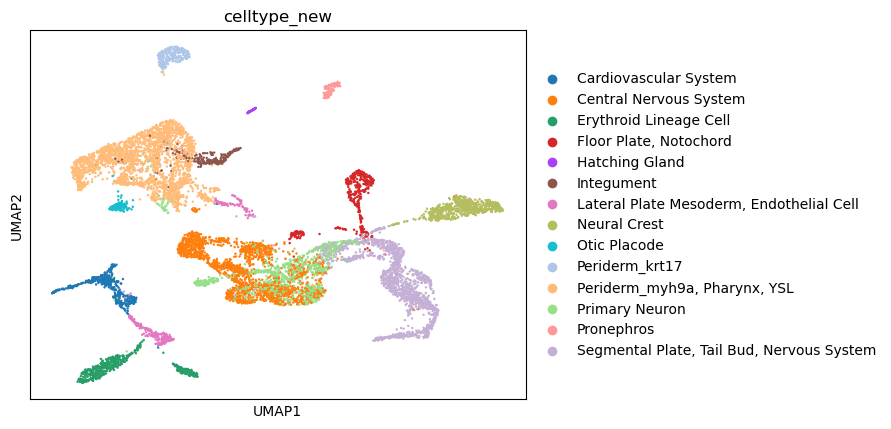

{'Floor Plate, Notochord': '#1f77b4', 'Periderm_myh9a, Pharynx, YSL': '#ff7f0e', 'Erythroid Lineage Cell': '#279e68', 'Primary Neuron': '#d62728', 'Cardiovascular System': '#aa40fc', 'Central Nervous System': '#8c564b', 'Periderm_krt17': '#e377c2', 'Hatching Gland': '#b5bd61', 'Pronephros': '#17becf', 'Otic Placode': '#aec7e8', 'Segmental Plate, Tail Bud, Nervous System': '#ffbb78', 'Neural Crest': '#98df8a', 'Integument': '#ff9896', 'Lateral Plate Mesoderm, Endothelial Cell': '#c5b0d5'}


<Figure size 640x480 with 0 Axes>

In [22]:
import scanpy as sc
import os
import matplotlib.pyplot as plt

# Ensure neighbors and UMAP are calculated
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=40)
sc.tl.umap(adata)

# Check if 'celltype_new' exists in the obs
if 'celltype_new' in adata.obs:
    sc.pl.umap(adata, color='celltype_new')

    # Clear the figure before saving to avoid empty output
    plt.clf()

    # Create output directory
    output_dir = "D:/pythonplaces/MACD_github/img/dataset3/"
    os.makedirs(output_dir, exist_ok=True)

    # Save the plot to the file
    sc.pl.umap(adata, color='celltype_new', show=False)
    plt.savefig(os.path.join(output_dir, "scRNA_umap_plot.pdf"), format="pdf")
    plt.close()
else:
    print("'celltype_new' not found in adata.obs")

# Check color mapping if available
if 'celltype_new_colors' in adata.uns:
    color_map = dict(zip(adata.obs['celltype_new'].unique(), adata.uns['celltype_new_colors']))
    print(color_map)
else:
    print("No color mapping found in 'adata.uns'.")


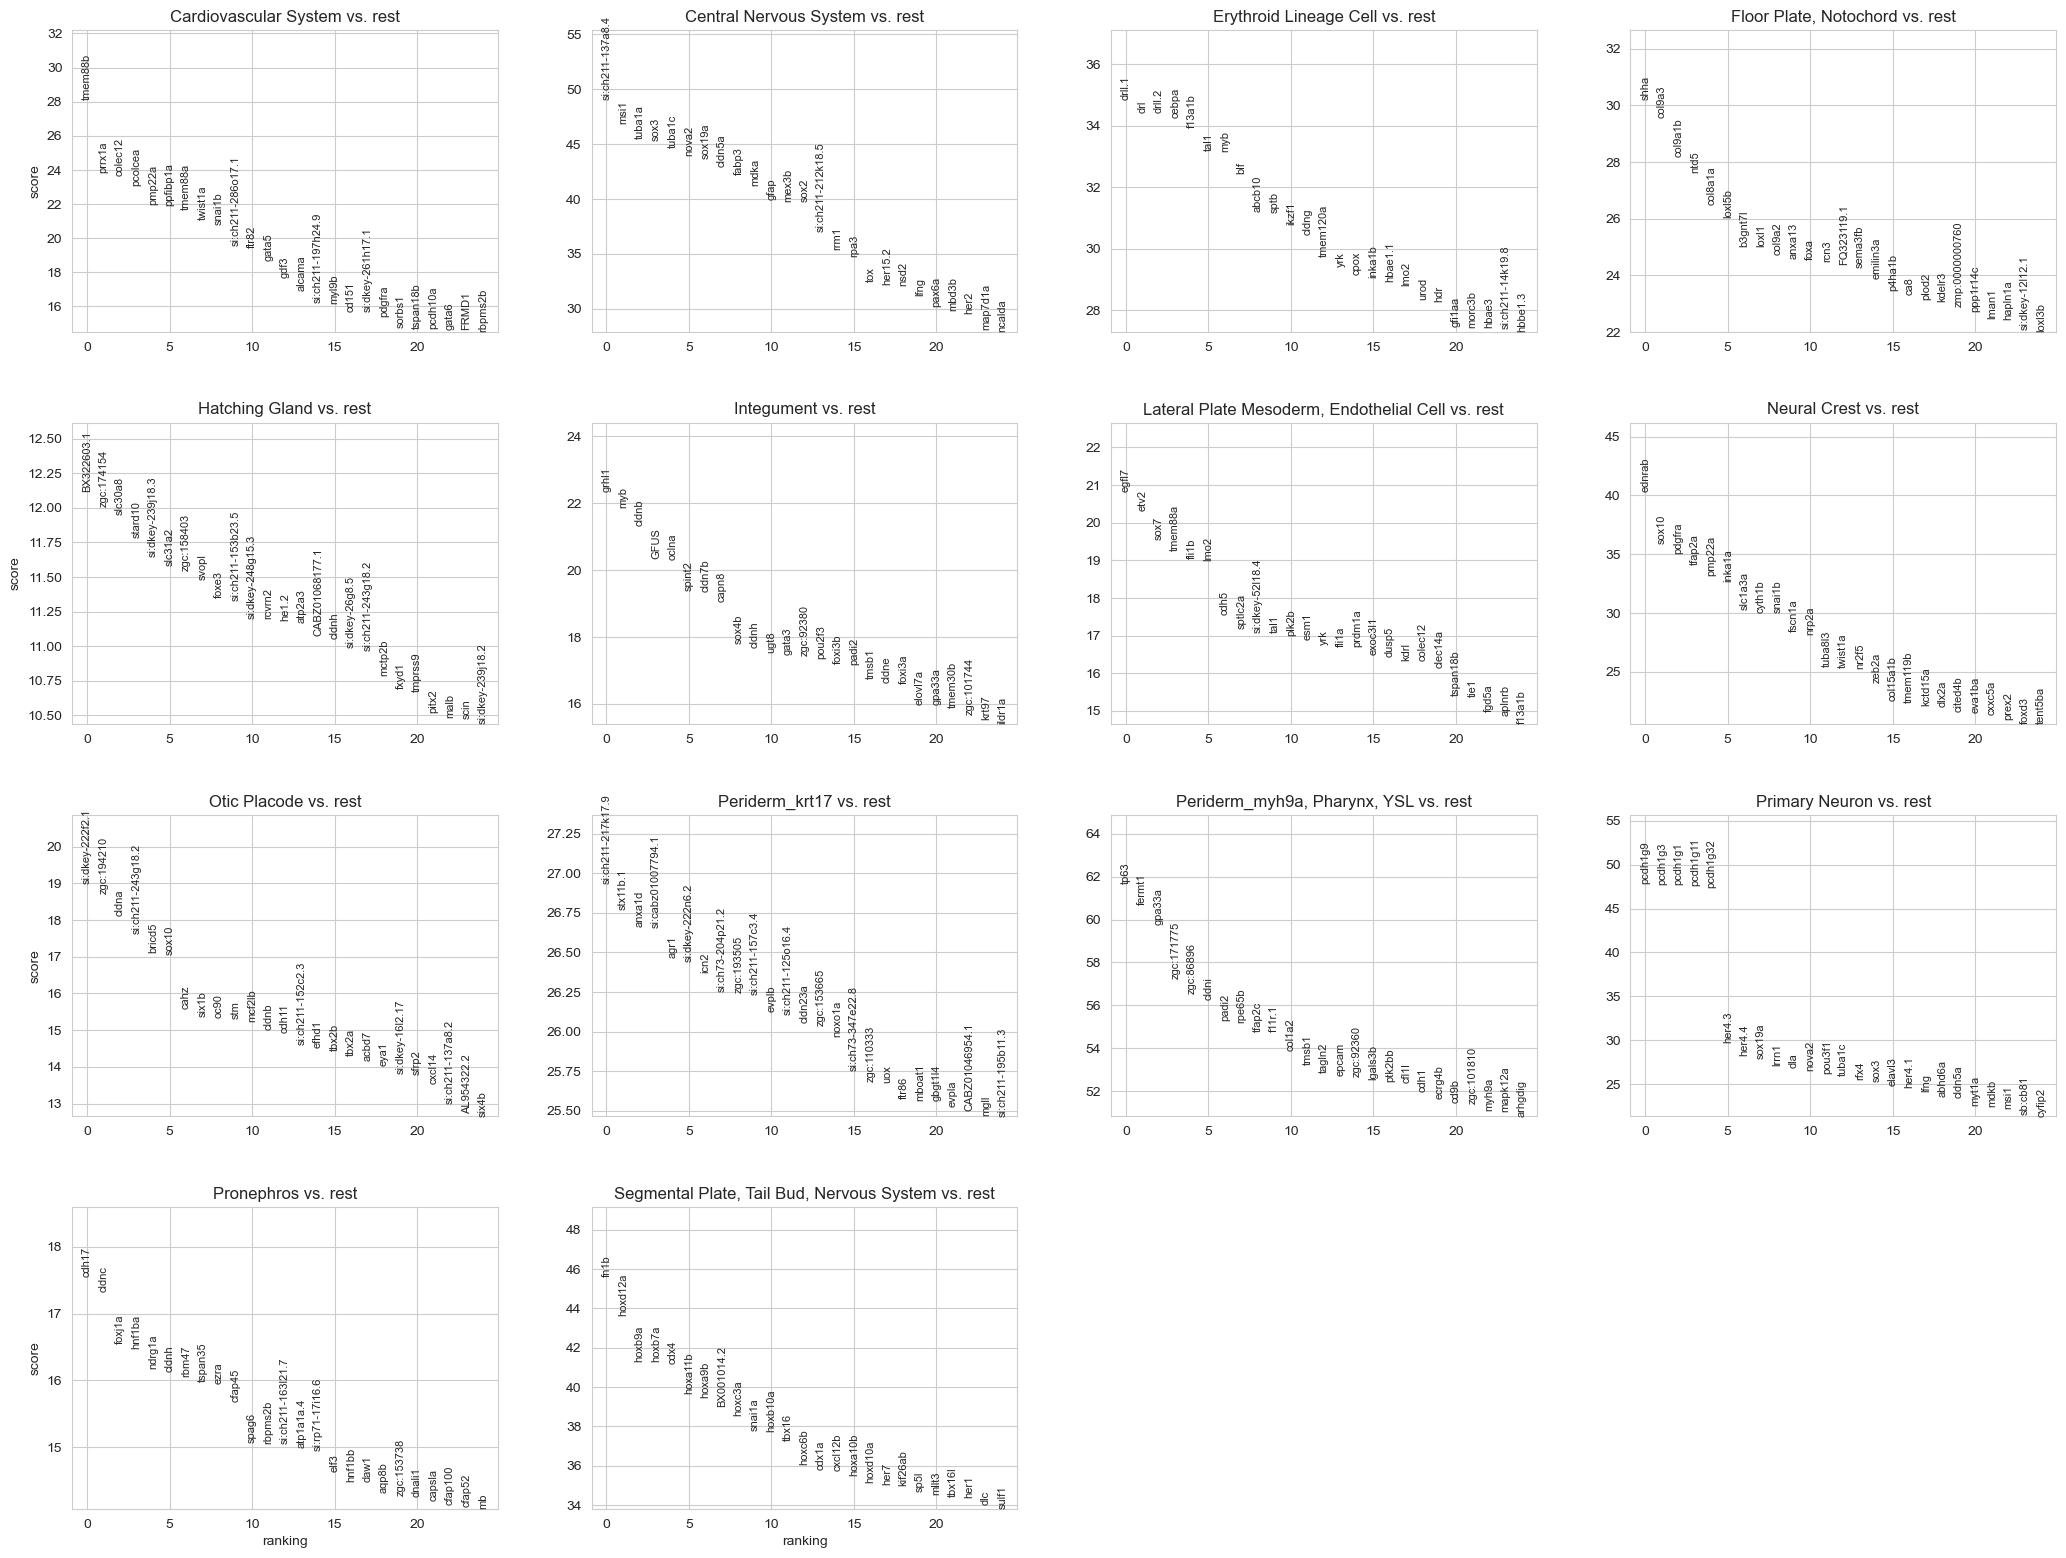

Cell type: Cardiovascular System, Top 10 marker genes: ['tmem88b' 'prrx1a' 'colec12']
Cell type: Central Nervous System, Top 10 marker genes: ['si:ch211-137a8.4' 'msi1' 'tuba1a']
Cell type: Erythroid Lineage Cell, Top 10 marker genes: ['drll.1' 'drl' 'drll.2']
Cell type: Floor Plate, Notochord, Top 10 marker genes: ['shha' 'col9a3' 'col9a1b']
Cell type: Hatching Gland, Top 10 marker genes: ['BX322603.1' 'zgc:174154' 'slc30a8']
Cell type: Integument, Top 10 marker genes: ['grhl1' 'myb' 'cldnb']
Cell type: Lateral Plate Mesoderm, Endothelial Cell, Top 10 marker genes: ['egfl7' 'etv2' 'sox7']
Cell type: Neural Crest, Top 10 marker genes: ['ednrab' 'sox10' 'pdgfra']
Cell type: Otic Placode, Top 10 marker genes: ['si:dkey-222f2.1' 'zgc:194210' 'cldna']
Cell type: Periderm_krt17, Top 10 marker genes: ['si:ch211-217k17.9' 'stx11b.1' 'anxa1d']
Cell type: Periderm_myh9a, Pharynx, YSL, Top 10 marker genes: ['tp63' 'fermt1' 'gpa33a']
Cell type: Primary Neuron, Top 10 marker genes: ['pcdh1g9' 'pcd

In [66]:
# print(adata.obs['celltype_new'])
sc.pp.normalize_total(adata, target_sum=1e4) # 不要和log顺序搞反了 ，这个是去文库的
sc.pp.log1p(adata)
sc.tl.rank_genes_groups(adata, 'celltype_new', method='wilcoxon')
# 绘制差异表达基因结果
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
top_genes = {group: result['names'][group][:3] for group in groups}

for group, genes in top_genes.items():
    print(f"Cell type: {group}, Top 10 marker genes: {genes}")

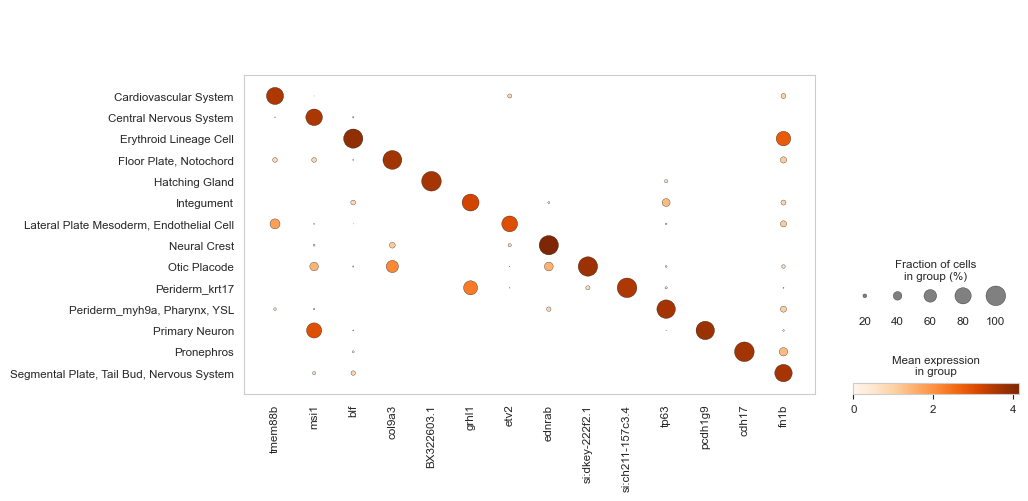

In [69]:
# adata=ad.read_h5ad('D:\pythonplaces\MACD_github\Datasets\preproced_data\dataset2\Scdata_filter.h5ad')
selected_genes = {
    'Cardiovascular System': ['tmem88b'],
    'Central Nervous System': ['msi1'],
    'Erythroid Lineage Cell': ['blf'],
    'Floor Plate, Notochord': ['col9a3'],
    'Hatching Gland': ['BX322603.1'],
    'Integument': ['grhl1'],
    'Lateral Plate Mesoderm': ['etv2'],
    ' Neural Crest': ['ednrab'],
    ' Otic Placode': ['si:dkey-222f2.1'],
    'Periderm_krt17': ['si:ch211-157c3.4'],
    'Periderm_myh9a, Pharynx, YSL': ['tp63'],
    'Primary Neuron': ['pcdh1g9'],
    'Pronephros': ['cdh17'],
    'Segmental Plate': ['fn1b'],
}
import matplotlib.pyplot as plt
import scanpy as sc

# 提取表达数据
genes_to_plot = [gene for genes in selected_genes.values() for gene in genes]

# 创建adata_sub的副本，以防止修改原数据
adata_sub = adata[:, genes_to_plot].copy()

# 检查'cell_types'列是否存在
if 'celltype_new' not in adata.obs.columns:
    raise ValueError("'cell_types' column is not found in adata.obs")

# 去除可能的空格并统一细胞类型标签
adata.obs['celltype_new'] = adata.obs['celltype_new'].str.strip()

# 创建一个新的图形
fig, ax = plt.subplots(figsize=(10, 5))

# 使用scanpy绘制DotPlot，并返回轴对象
sc.pl.dotplot(
    adata_sub, 
    var_names=genes_to_plot, 
    groupby='celltype_new',  # 根据细胞类型进行分组
    cmap='Oranges',  # 可以选择其他配色方案，如'viridis', 'coolwarm'
    dot_max=1, 
    dot_min=0.1, 
    ax=ax,  # 在ax上绘制
    show=False  # 禁止自动显示图形
)

# 保存图形
plt.savefig("D:/pythonplaces/MACD_github/img/dataset3/spatial_composition_plots_maker.pdf", format="pdf", bbox_inches="tight")

# 显示图形
plt.show()


In [18]:
import anndata as ad
from matplotlib import pyplot as plt
import numpy as np
st_file ="D:\pythonplaces\MACD_github\Datasets\preproced_data\dataset3\Real_STdata_filter.h5ad"
stadata = ad.read_h5ad(st_file)
stadata
# 选择感兴趣的基因

AnnData object with n_obs × n_vars = 3048 × 2396
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'seurat_clusters', 'spatial_x', 'spatial_y', 'slice', 'time_point', 'bin_annotation', 'colors', 'layer_annotation', 'layer_colors', 'n_genes'
    layers: 'counts', 'norm'

Index(['Periderm_myh9a, Pharynx, YSL', 'Central Nervous System',
       'Segmental Plate, Tail Bud, Nervous System', 'Primary Neuron',
       'Neural Crest', 'Erythroid Lineage Cell', 'Cardiovascular System',
       'Floor Plate, Notochord', 'Lateral Plate Mesoderm, Endothelial Cell',
       'Periderm_krt17', 'Integument', 'Otic Placode', 'Pronephros',
       'Hatching Gland'],
      dtype='object')


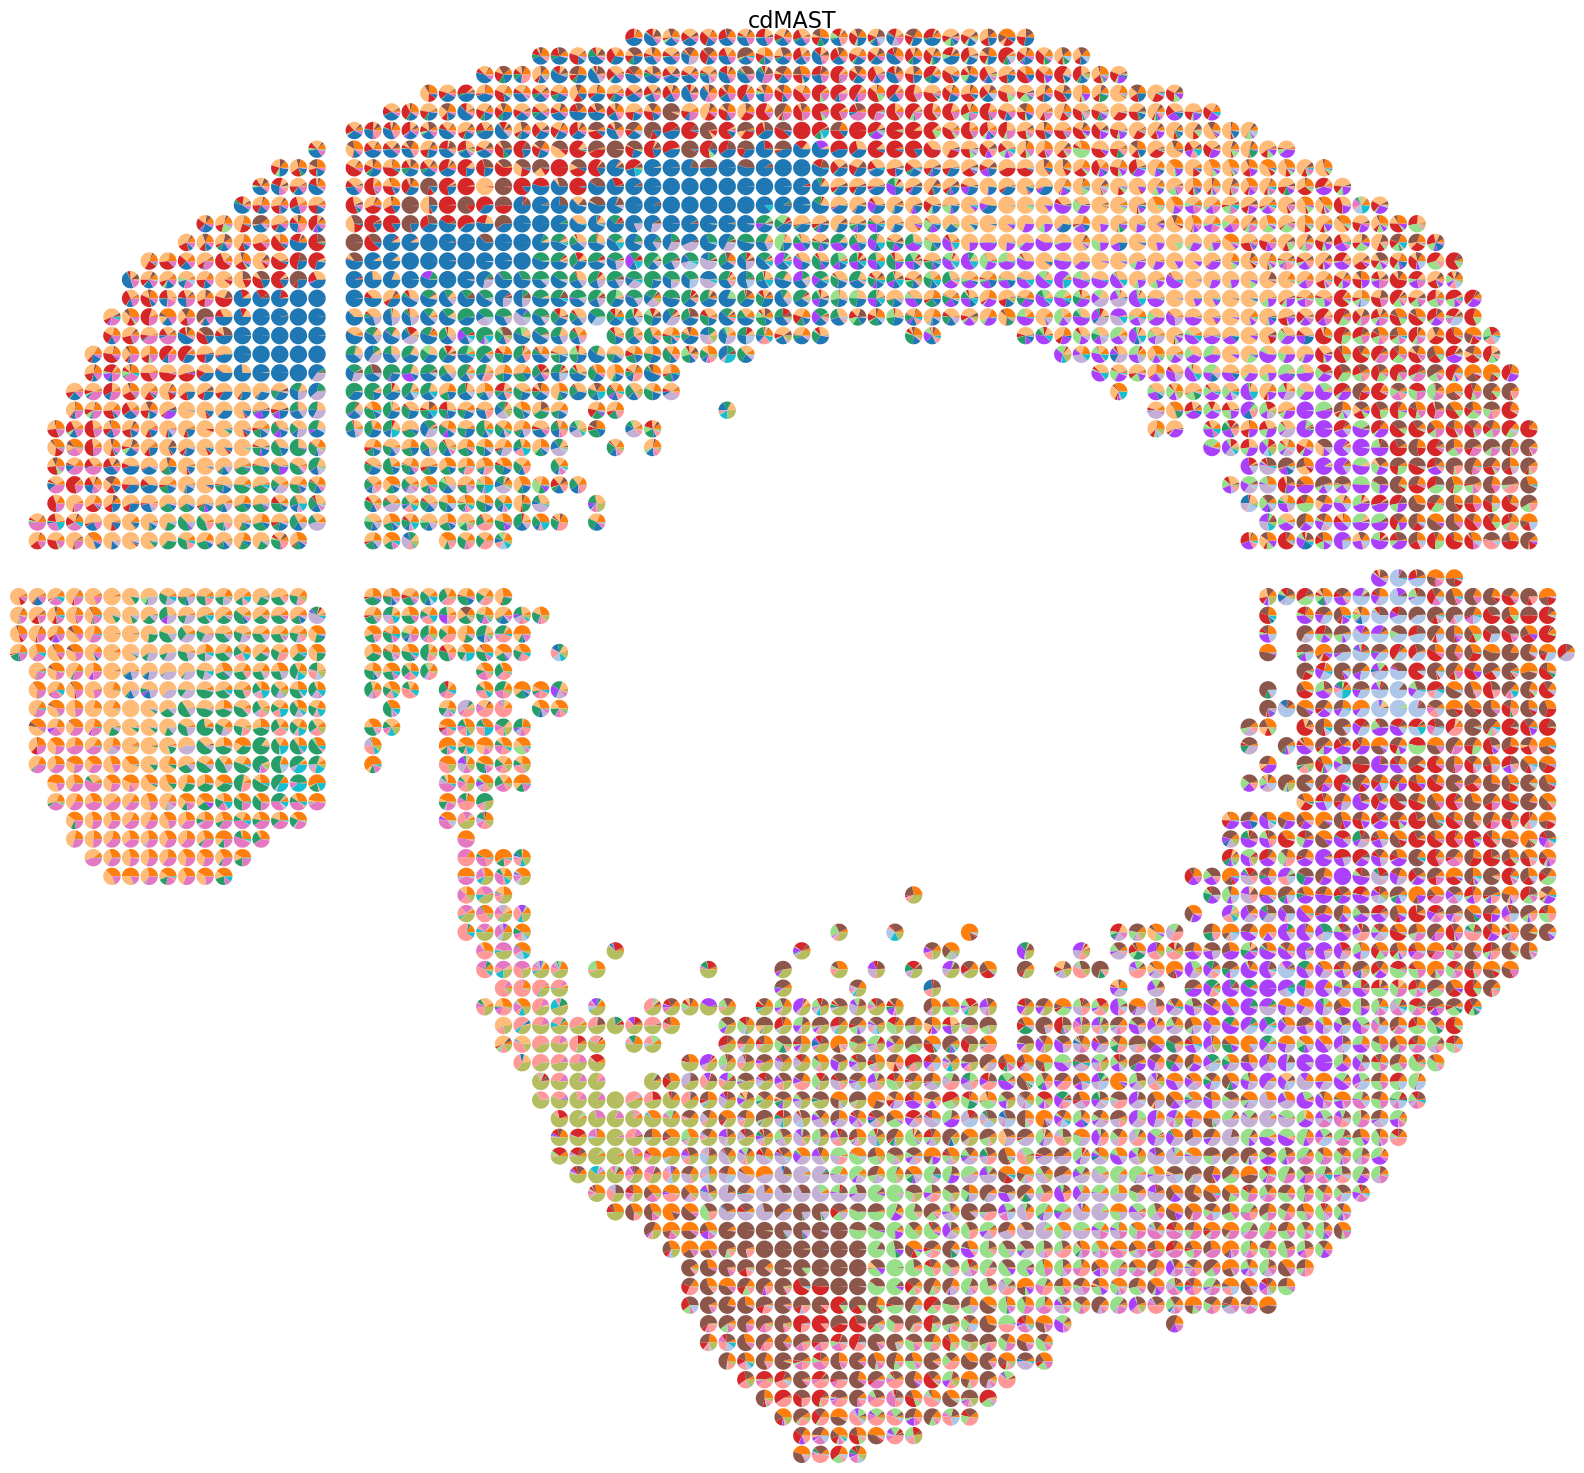

In [23]:
import pandas as pd
composition_data = pd.read_csv('D:\pythonplaces\MACD_github\MACD1\Result\dataset3/final_pro.csv')

cell_type_columns = composition_data.columns[1:]
print(cell_type_columns)

coords = pd.DataFrame({
    'x': np.array(stadata.obs['spatial_x']),  # x-coordinates of spots
    'y': np.array(stadata.obs['spatial_y'])   # y-coordinates of spots
})
merged_data = pd.concat([composition_data, coords], axis=1)

# Prepare the plot
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_aspect('equal')

# Loop through each spot and plot the composition as colored points
for i, row in merged_data.iterrows():
    # Get the (x, y) coordinates
    x, y = row['x'], row['y']
    
    # Get cell type proportions for the spot
    proportions = row[cell_type_columns].values*100
    # Extract cell types (should avoid 'Unnamed: 0' or any non-cell type columns)
    cell_types_in_row = row[cell_type_columns].index  # This should match cell types
    # Ensure we only use valid cell types
    valid_cell_types = [cell_type for cell_type in cell_types_in_row if cell_type in color_map]
    # Map each valid cell type to its corresponding color
    pie_colors = [color_map[cell_type] for cell_type in valid_cell_types]
    ax.pie(proportions, center=(x, y), radius=7,colors=pie_colors)


# Adjust plot limits based on data
# plt.xlim(-7500, -5500)  # 自定义 x 轴范围
# plt.ylim(6500, 8500)    # 自定义 y 轴范围
ax.set_xlim(merged_data['x'].min() - 1, merged_data['x'].max() + 1)
ax.set_ylim(merged_data['y'].min() - 1, merged_data['y'].max() + 1)
ax.set_title("cdMAST", fontsize=16)
plt.savefig("D:\pythonplaces\MACD_github\img\dataset3/spatial_composition_plots_cdADDA.pdf", format="pdf", bbox_inches="tight")
# Show the plot
plt.show()


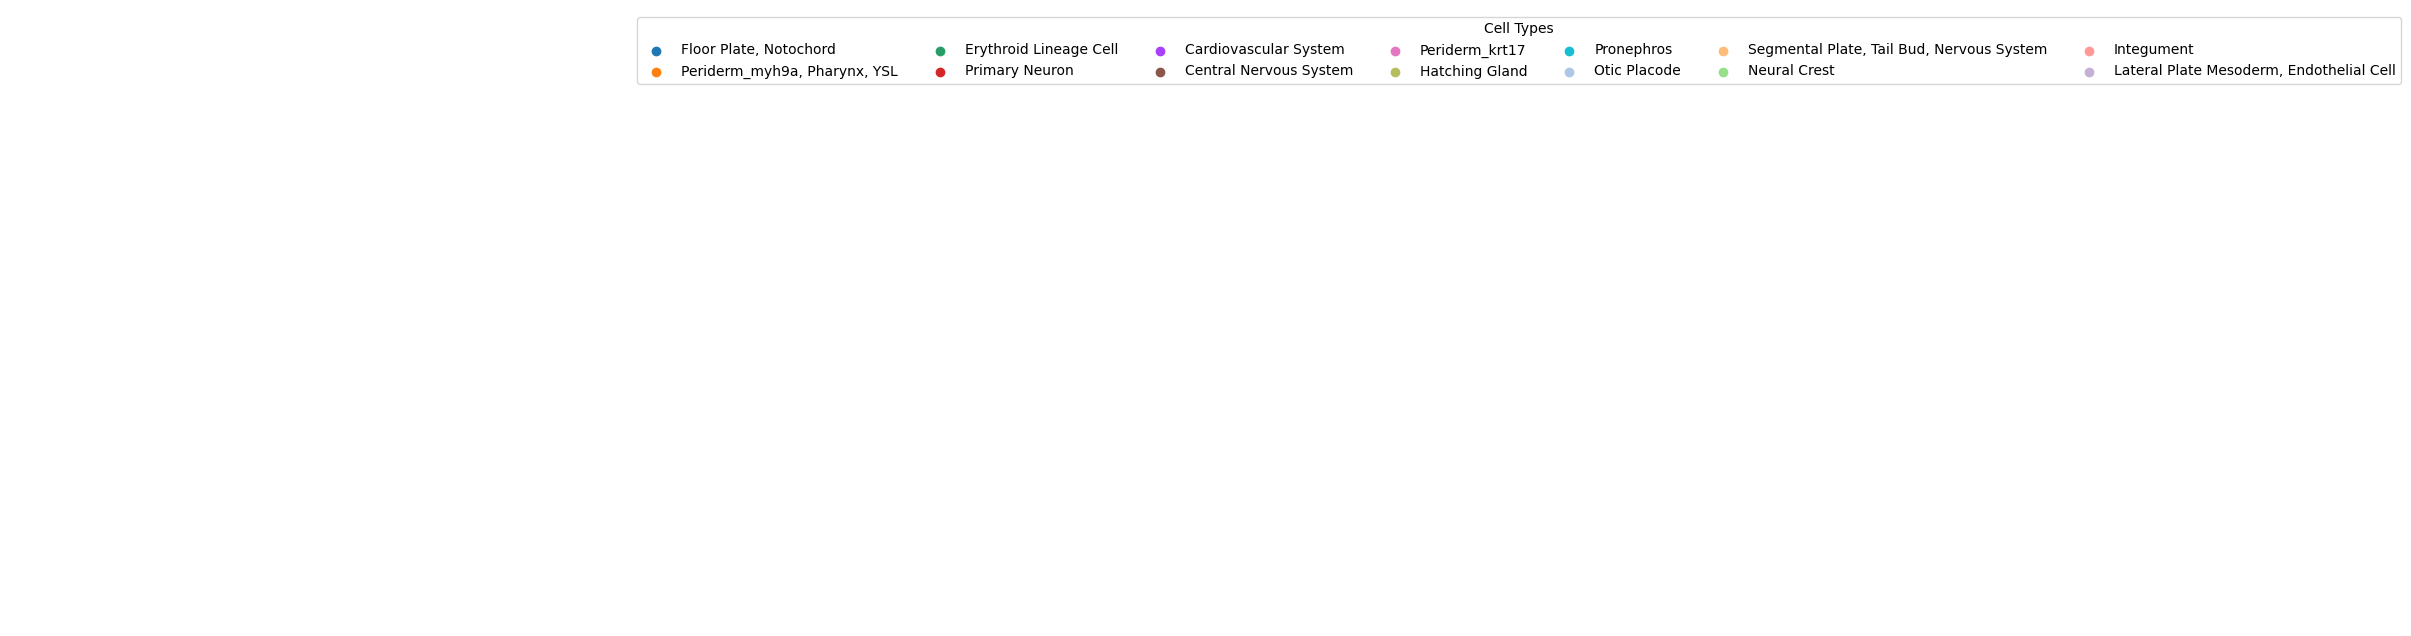

In [24]:
plt.figure(figsize=(8, 8))  # 可选，设置图像的大小
color_map={'Floor Plate, Notochord': '#1f77b4', 'Periderm_myh9a, Pharynx, YSL': '#ff7f0e', 'Erythroid Lineage Cell': '#279e68', 'Primary Neuron': '#d62728', 'Cardiovascular System': '#aa40fc', 'Central Nervous System': '#8c564b', 'Periderm_krt17': '#e377c2', 'Hatching Gland': '#b5bd61', 'Pronephros': '#17becf', 'Otic Placode': '#aec7e8', 'Segmental Plate, Tail Bud, Nervous System': '#ffbb78', 'Neural Crest': '#98df8a', 'Integument': '#ff9896', 'Lateral Plate Mesoderm, Endothelial Cell': '#c5b0d5'}
for cell_type, color in color_map.items():
    plt.scatter([], [], color=color, label=cell_type)  # 为空数据点创建图例

# 添加图例，分为两列
plt.legend(title="Cell Types", loc='upper left', bbox_to_anchor=(1, 1), ncol=7)

# 显示图像
plt.axis('off')  # 可选，关闭坐标轴
plt.savefig("D:/pythonplaces/MACD_github/img/dataset3/spatial_composition_plots_cdADDA_tuli.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

# Load the spatial data
st_file = "D:\pythonplaces\MACD_github\Datasets\preproced_data\dataset3\Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)
# Load the composition data (cell type proportions)
composition_data = pd.read_csv('D:\pythonplaces\MACD_github\Baselines\Spoint\Result\dataset3\proportion.csv')
# Ensure composition_data columns are in the correct order
cell_type_columns = composition_data.columns[1:]
print(cell_type_columns)
# Extract spot coordinates from stadata
coords = pd.DataFrame({
    'x': np.array(stadata.obs['spatial_x']),  # x-coordinates of spots
    'y': np.array(stadata.obs['spatial_y'])   # y-coordinates of spots
})
coords.shape,composition_data.shape

Index(['Unnamed: 0', 'Periderm_myh9a, Pharynx, YSL', 'Central Nervous System',
       'Segmental Plate, Tail Bud, Nervous System', 'Primary Neuron',
       'Neural Crest', 'Erythroid Lineage Cell', 'Cardiovascular System',
       'Floor Plate, Notochord', 'Lateral Plate Mesoderm, Endothelial Cell',
       'Periderm_krt17', 'Integument', 'Otic Placode', 'Pronephros',
       'Hatching Gland'],
      dtype='object')


((30848, 2), (30848, 15))

Index(['Periderm_myh9a, Pharynx, YSL', 'Central Nervous System',
       'Segmental Plate, Tail Bud, Nervous System', 'Primary Neuron',
       'Neural Crest', 'Erythroid Lineage Cell', 'Cardiovascular System',
       'Floor Plate, Notochord', 'Lateral Plate Mesoderm, Endothelial Cell',
       'Periderm_krt17', 'Integument', 'Otic Placode', 'Pronephros',
       'Hatching Gland'],
      dtype='object')
       Unnamed: 0  Periderm_myh9a, Pharynx, YSL  Central Nervous System  \
15111       15111                      0.122175                0.006787   
15112       15112                      0.072307                0.009991   
15113       15113                      0.000119                0.005178   
15114       15114                      0.168303                0.002985   
15115       15115                      0.205473                0.005552   
...           ...                           ...                     ...   
18154       18154                      0.111502                0.345380 

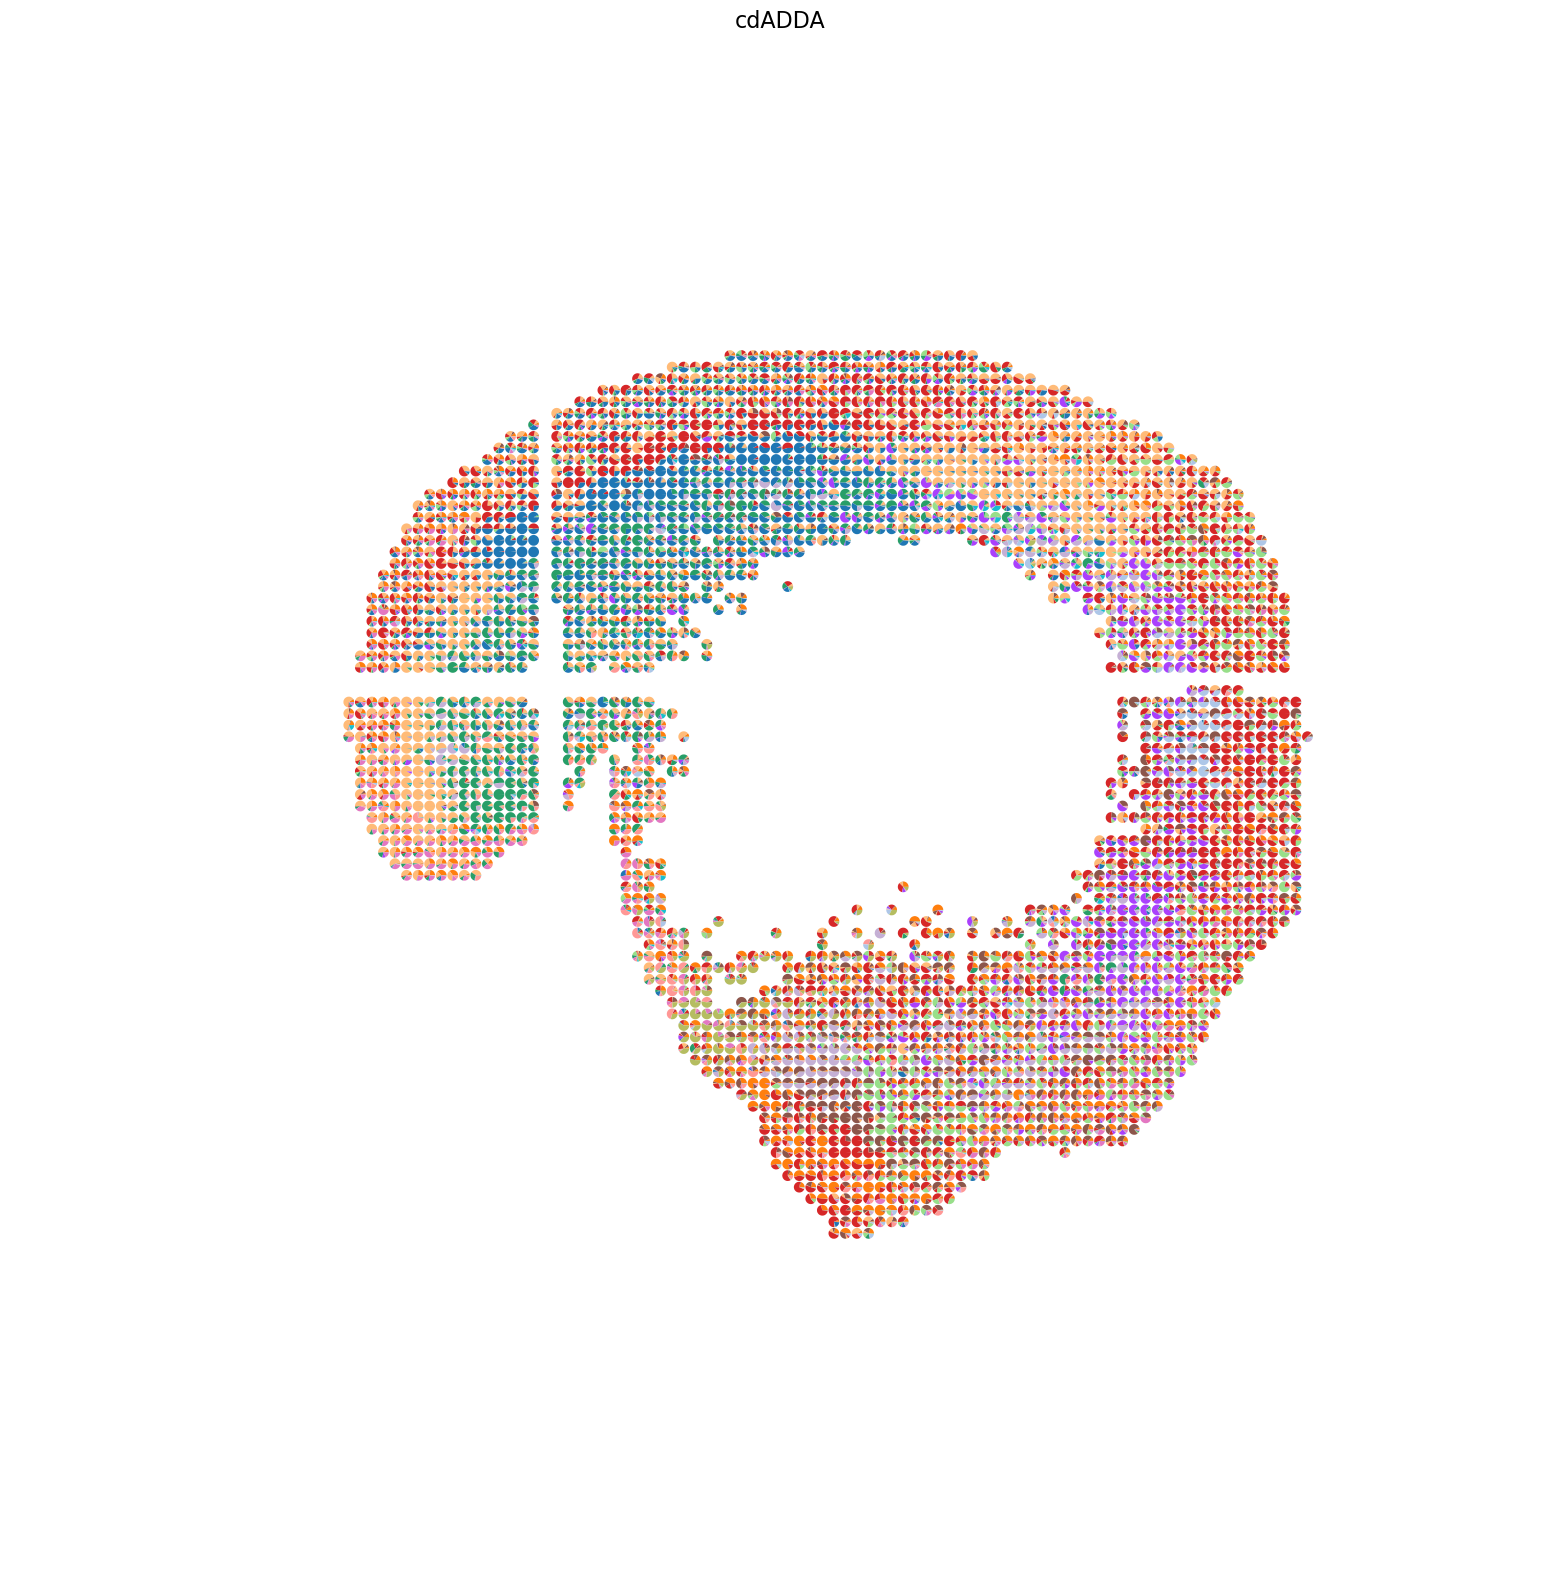

In [15]:

composition_data = pd.read_csv('D:\pythonplaces\MACD_github\MACD\Result\dataset3/final_pro.csv')

cell_type_columns = composition_data.columns[1:]
print(cell_type_columns)

coords = pd.DataFrame({
    'x': np.array(stadata.obs['spatial_x']),  # x-coordinates of spots
    'y': np.array(stadata.obs['spatial_y'])   # y-coordinates of spots
})
merged_data = pd.concat([composition_data, coords], axis=1)

x_min, x_max = -7500, -5500
y_min, y_max = 6500, 8500

# 筛选出在这些坐标范围内的数据
filtered_data = merged_data[(merged_data['x'] >= x_min) & (merged_data['x'] <= x_max) & 
                            (merged_data['y'] >= y_min) & (merged_data['y'] <= y_max)]

print(filtered_data)
# Prepare the plot
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_aspect('equal')

# Loop through each spot and plot the composition as colored points
for i, row in filtered_data.iterrows():
    # Get the (x, y) coordinates
    x, y = row['x'], row['y']
    
    # Get cell type proportions for the spot
    proportions = row[cell_type_columns].values*100
    # Extract cell types (should avoid 'Unnamed: 0' or any non-cell type columns)
    cell_types_in_row = row[cell_type_columns].index  # This should match cell types
    # Ensure we only use valid cell types
    valid_cell_types = [cell_type for cell_type in cell_types_in_row if cell_type in color_map]
    # Map each valid cell type to its corresponding color
    pie_colors = [color_map[cell_type] for cell_type in valid_cell_types]
    ax.pie(proportions, center=(x, y), radius=7,colors=pie_colors)


# Adjust plot limits based on data
# plt.xlim(-7500, -5500)  # 自定义 x 轴范围
# plt.ylim(6500, 8500)    # 自定义 y 轴范围
ax.set_xlim(-7500, -5500)
ax.set_ylim(6500, 8500)
ax.set_title("cdADDA", fontsize=16)
plt.savefig("D:\pythonplaces\MACD_github\img\dataset3/spatial_composition_plots_cdADDA.pdf", format="pdf", bbox_inches="tight")
# Show the plot
plt.show()


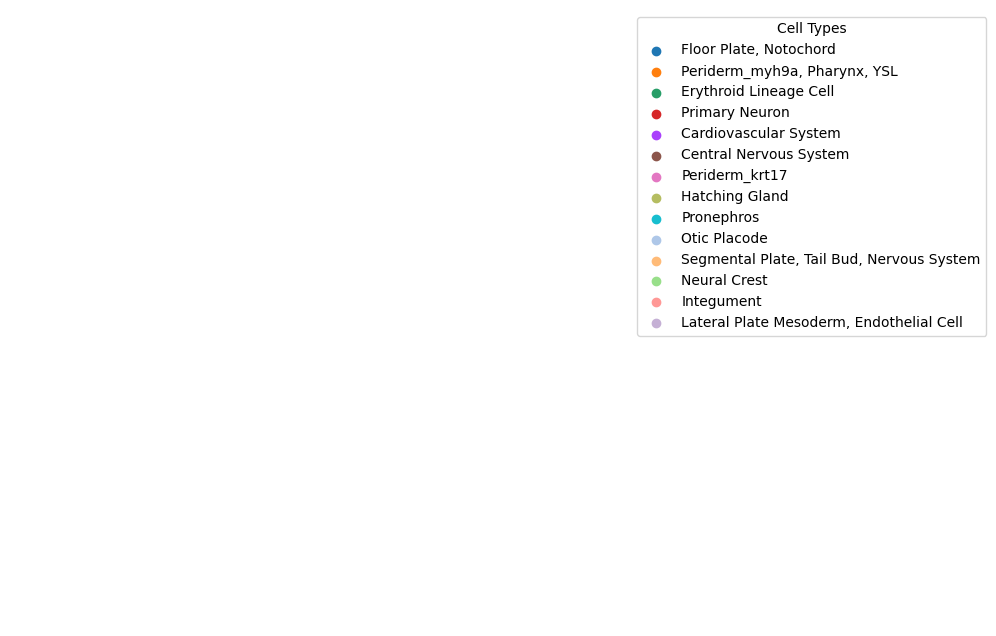

In [47]:
plt.figure(figsize=(8, 8))  # 可选，设置图像的大小

# 为每个细胞类型创建一个点
for cell_type, color in color_map.items():
    plt.scatter([], [], color=color, label=cell_type)  # 为空数据点创建图例

# 添加图例，分为两列
plt.legend(title="Cell Types", loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

# 显示图像
plt.axis('off')  # 可选，关闭坐标轴
plt.savefig("D:/pythonplaces/MACD_github/img/dataset3/spatial_composition_plots_cdADDA_tuli.pdf", format="pdf", bbox_inches="tight")
plt.show()

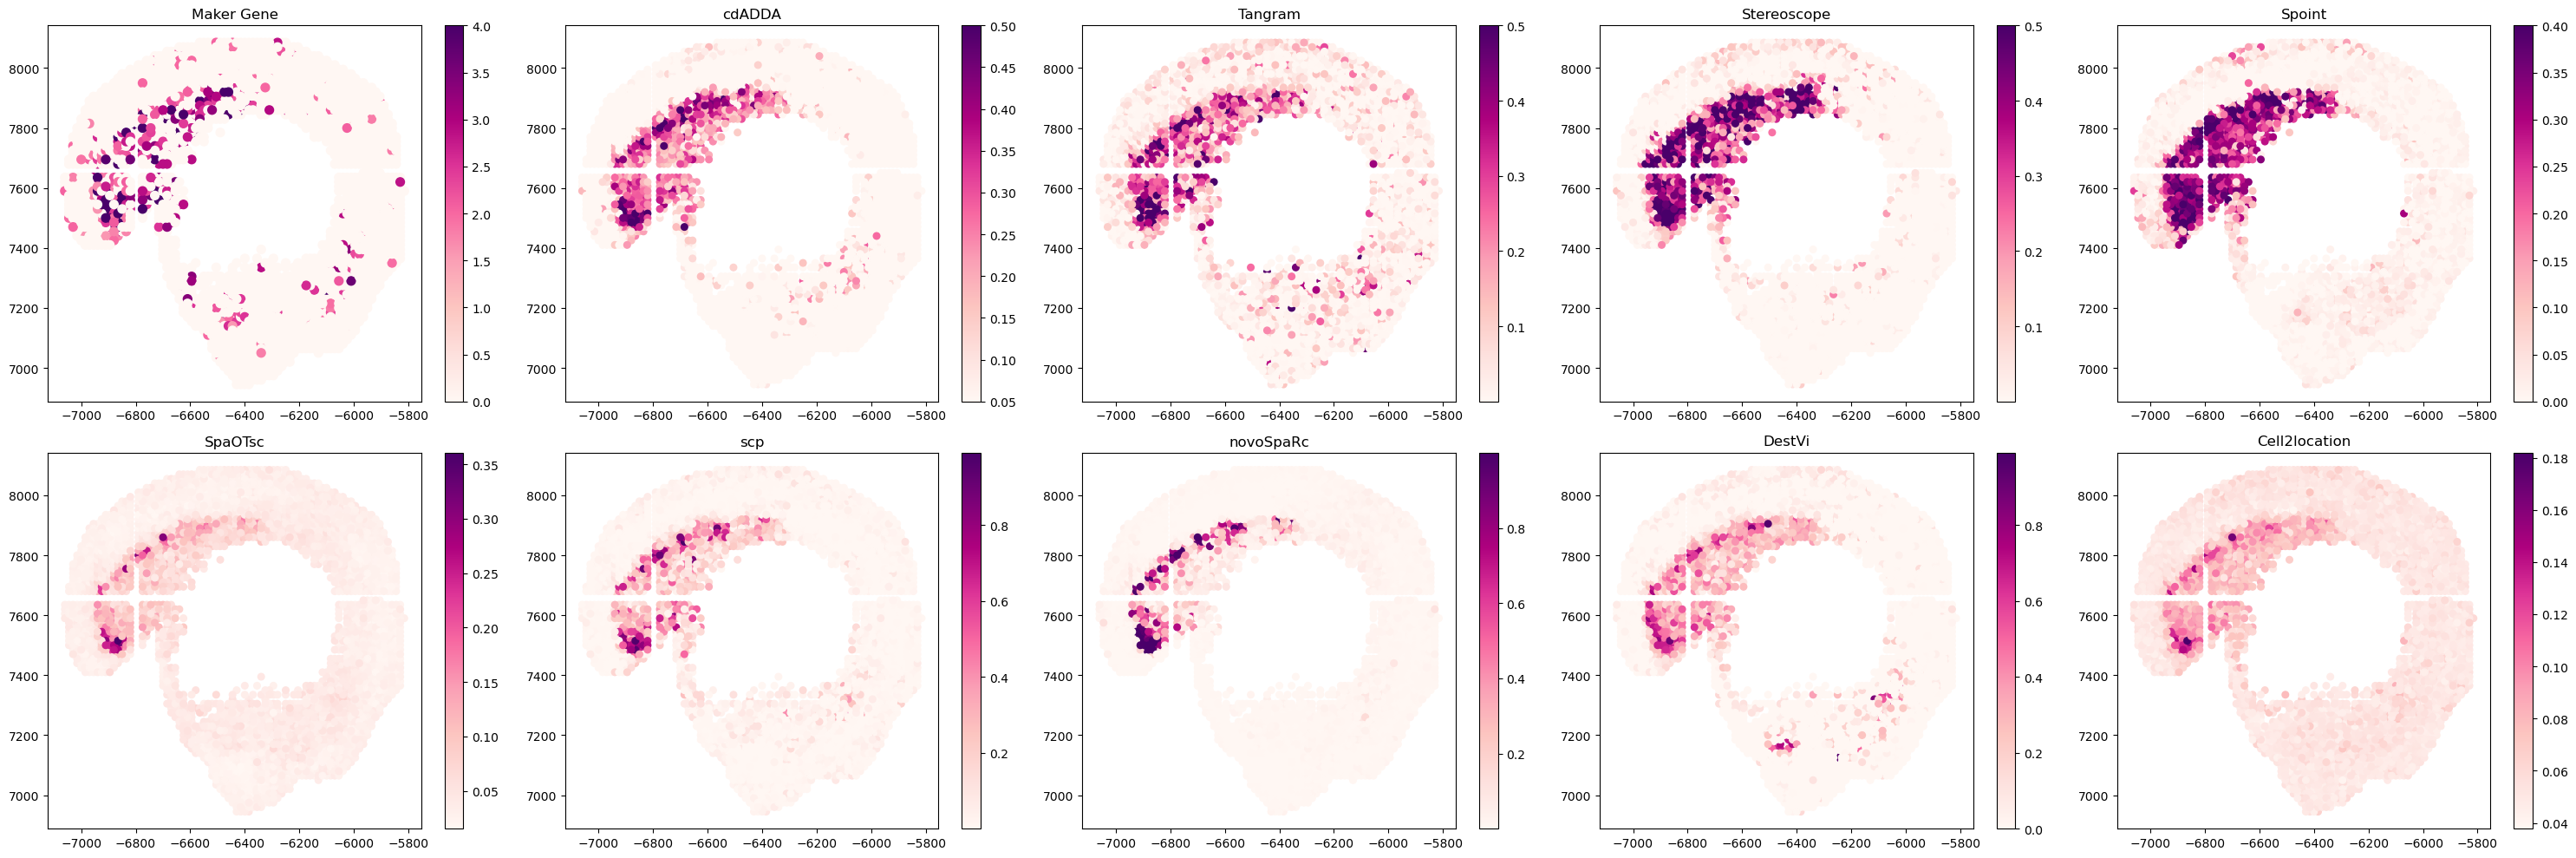

In [26]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# Load stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset3/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)
#Cell type: Erythroid Lineage Cell, Top 10 marker genes: ['blf' 'cebpa' 'drll.1' 'f13a1b' 'drl' 'drll.2' 'myb' 'tal1' 'cpox'
 # 'inka1b' 'abcb10' 'sptb' 'cldng'
genes_of_interest = ['f13a1b']
celltype = ['Erythroid Lineage Cell']
x_coordinates = np.array(stadata.obs['spatial_x'])
y_coordinates = np.array(stadata.obs['spatial_y'])

# Create 2x5 layout for plotting
fig, axes = plt.subplots(2, 5, figsize=(30, 10))

# List of results (example paths; replace with actual paths)
composition_data_files = [
    "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset3/Real_STdata_filter.h5ad",
    'D:/pythonplaces/MACD_github/MACD1/Result/dataset3/final_pro.csv',
    'D:/pythonplaces/MACD_github/Baselines/Tangram/Result/dataset3/Tangram_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Stereoscope/Result/dataset3/Stereoscope_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Spoint/Result/dataset3/proportion.csv',
    'D:/pythonplaces/MACD_github/Baselines/SpaOTsc-master/Result/dataset3/SpaOTsc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/scpDeconv/Result/dataset3/final_preds.csv',
    'D:/pythonplaces/MACD_github/Baselines/novoSpaRc/Result/dataset3/novoSpaRc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/DestVi/Result/dataset3/DestVI_result.csv',
    'D:\pythonplaces\MACD_github\Baselines\Cell2location\Result\dataset3\Cell2location_result2.csv'
]
titles = [ 'Maker Gene','cdADDA', 'Tangram', 'Stereoscope', 'Spoint',
    'SpaOTsc', 'scp', 'novoSpaRc', 'DestVi', 'Cell2location'
]

for i, file_path in enumerate(composition_data_files):
    # Load the result for the ith method 
    if i==0:
        celltype_expression=stadata[:, genes_of_interest].X.toarray()+stadata[:, 'blf'].X.toarray()
    else:
        result_df = pd.read_csv(file_path)
        if 'Erythroid Lineage Cell' in result_df.columns:
           celltype_expression = result_df['Erythroid Lineage Cell'].values
        

    # Plot for the corresponding method
    ax = axes[i // 5, i % 5]  # 2x5 layout
    if i==0:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=50,vmax=4)
    elif i==1:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.5,vmin=0.05)
    elif i==2 or i==3:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.5)
    elif i==4:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.4)
    elif i==6 or i==8:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.99)
    else:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30)
    ax.set_title(titles[i])
    # Add colorbar
    fig.colorbar(scatter, ax=ax, orientation='vertical')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("D:\pythonplaces\MACD_github\img\dataset3/result.pdf", format="pdf", bbox_inches="tight")
plt.show()


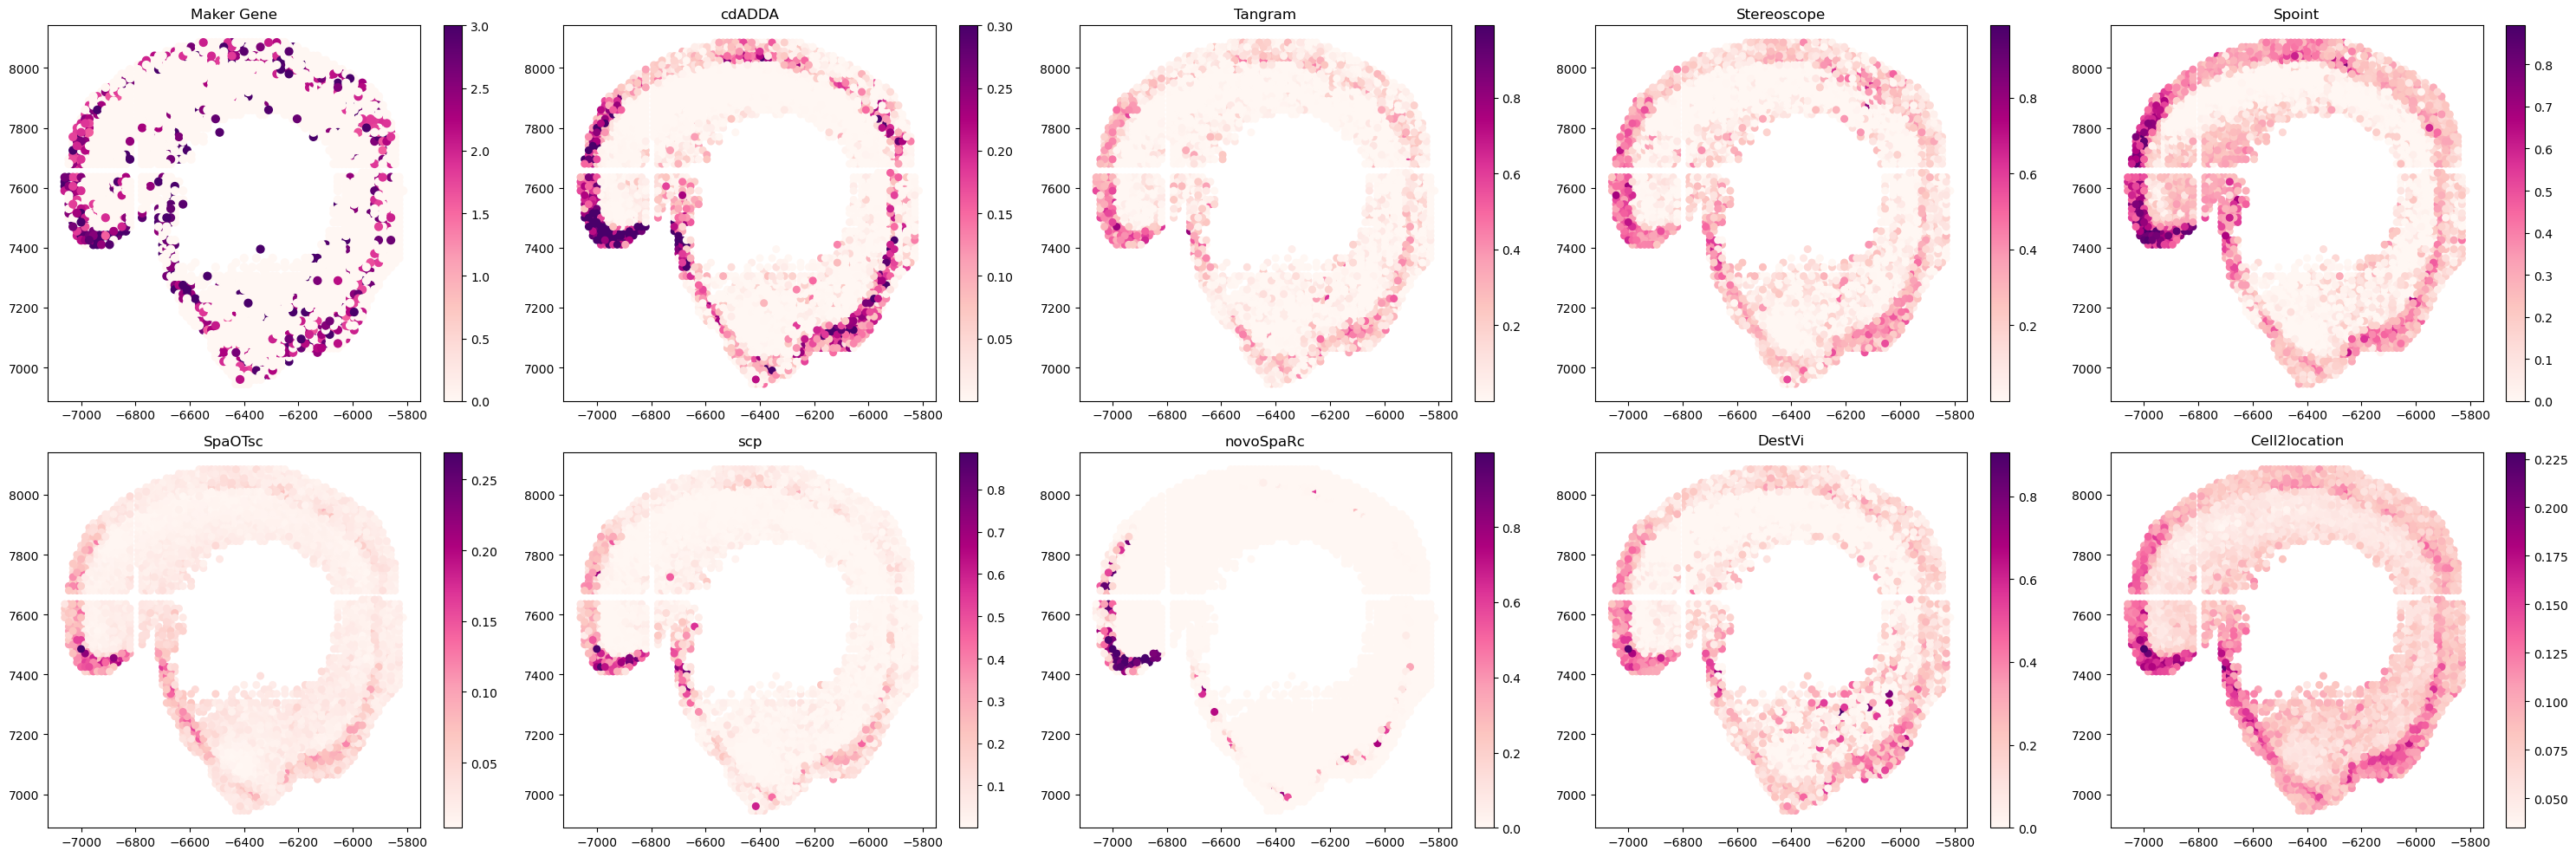

In [25]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# Load stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset3/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)
 # Cell type: Periderm_krt17, Top 10 marker genes: ['capn9' 'si:ch211-157c3.4' 'icn2' 'zgc:193505' 'agr1' 'anxa1c'




genes_of_interest = ['si:ch211-157c3.4']
# celltype = ['Erythroid Lineage Cell']
x_coordinates = np.array(stadata.obs['spatial_x'])
y_coordinates = np.array(stadata.obs['spatial_y'])

# Create 2x5 layout for plotting
fig, axes = plt.subplots(2, 5, figsize=(30, 10))

# List of results (example paths; replace with actual paths)
composition_data_files = [
    "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset3/Real_STdata_filter.h5ad",
    'D:/pythonplaces/MACD_github/MACD1/Result/dataset3/final_pro.csv',
    'D:/pythonplaces/MACD_github/Baselines/Tangram/Result/dataset3/Tangram_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Stereoscope/Result/dataset3/Stereoscope_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Spoint/Result/dataset3/proportion.csv',
    'D:/pythonplaces/MACD_github/Baselines/SpaOTsc-master/Result/dataset3/SpaOTsc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/scpDeconv/Result/dataset3/final_preds.csv',
    'D:/pythonplaces/MACD_github/Baselines/novoSpaRc/Result/dataset3/novoSpaRc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/DestVi/Result/dataset3/DestVI_result.csv',
    'D:\pythonplaces\MACD_github\Baselines\Cell2location\Result\dataset3\Cell2location_result2.csv'
]
titles = [ 'Maker Gene','cdADDA', 'Tangram', 'Stereoscope', 'Spoint',
    'SpaOTsc', 'scp', 'novoSpaRc', 'DestVi', 'Cell2location'
]

for i, file_path in enumerate(composition_data_files):
    # Load the result for the ith method 
    if i==0:
        celltype_expression=stadata[:, genes_of_interest].X.toarray()
    else:
        result_df = pd.read_csv(file_path)
        if 'Periderm_krt17' in result_df.columns:
           celltype_expression = result_df['Periderm_krt17'].values
        

    # Plot for the corresponding method
    ax = axes[i // 5, i % 5]  # 2x5 layout
    if i==0:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=40,vmax=3)
    elif i==1:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.3)
    elif i==2 or i==3 or i==3:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.99)
    else:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30)
    ax.set_title(titles[i])
    # Add colorbar
    fig.colorbar(scatter, ax=ax, orientation='vertical')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("D:\pythonplaces\MACD_github\img\dataset3/result1.pdf", format="pdf", bbox_inches="tight")
plt.show()


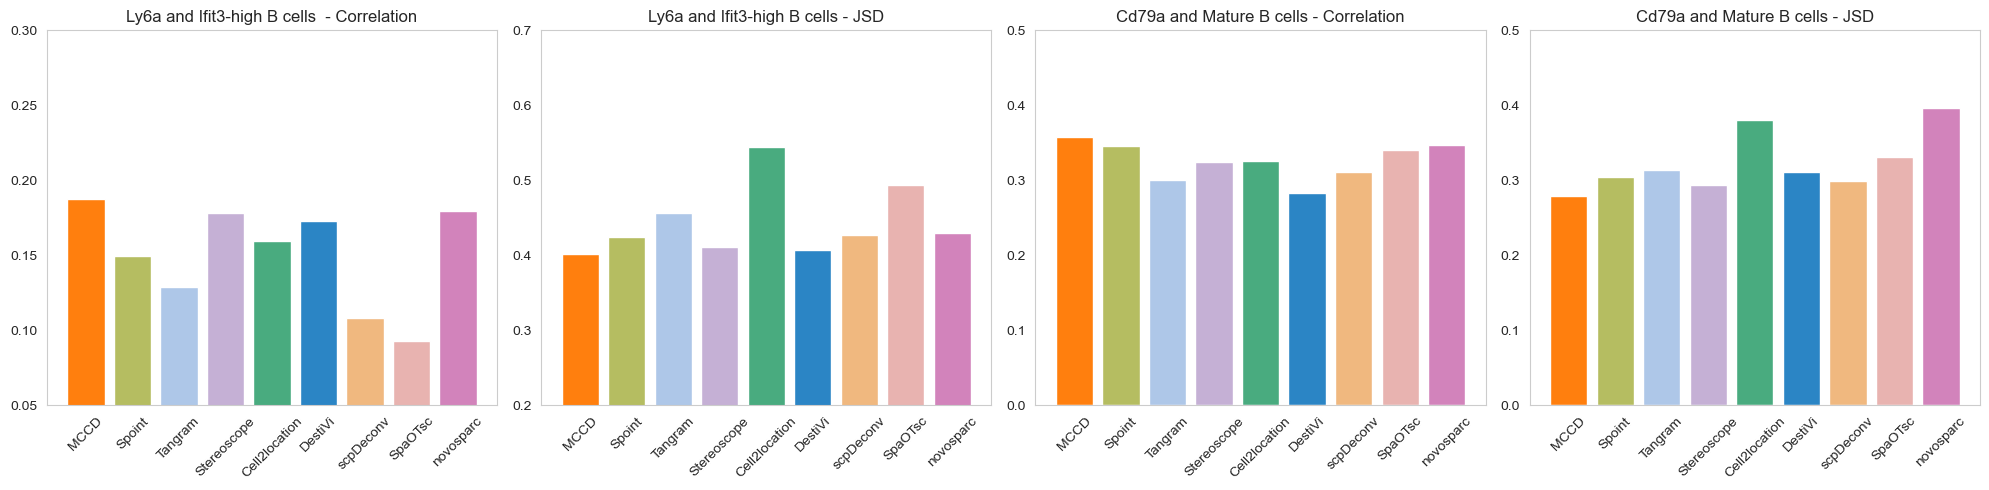

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 定义数据
methods = ['MCCD','Spoint','Tangram', 'Stereoscope', 'Cell2location', 'DestiVi', 'scpDeconv','SpaOTsc','novosparc' ]
corr_values_1 = [0.1877,0.1495,0.1291,0.1783,0.1599,0.1731,0.1085,0.093,0.1795]
jsd_values_1 = [0.4012,0.4248,0.4567,0.4108,0.5446,0.4075,0.4272,0.4944,0.4295]

corr_values_2 = [0.3573,0.3461,0.3,0.3251,0.3253,0.2835,0.3111,0.3410,0.3473]
jsd_values_2 = [0.2790,0.3042,0.3136,0.294,0.3804,0.3105,0.2989,0.3308,0.3961]

# 创建数据框
data_1 = {'Methods': methods, 'Correlation': corr_values_1, 'JSD': jsd_values_1}
data_2 = {'Methods': methods, 'Correlation': corr_values_2, 'JSD': jsd_values_2}

df_1 = pd.DataFrame(data_1)
df_2 = pd.DataFrame(data_2)
colors = [
        "#FF7F0E", "#B5BD61", "#AEC7E8", "#C5B0D5",
        "#49AB7F",  "#2B85C5", "#F0B87F",
        "#E8B3B0", "#D283BB", "#A068A1"
    ]
# colors=['#219723','#4889F1','#76608A','#FA6800','#A0522D','#1BA1E2','#647687']
# 设置图形大小
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 绘制第一个矩阵
axes[0].bar(df_1['Methods'], df_1['Correlation'], color=colors)
axes[0].set_title('Ly6a and Ifit3-high B cells  - Correlation')
axes[0].set_ylim(0.05, 0.3)
axes[0].tick_params(axis='x', rotation=45)

# 绘制第二个矩阵
axes[1].bar(df_1['Methods'], df_1['JSD'], color=colors)
axes[1].set_title('Ly6a and Ifit3-high B cells - JSD')
axes[1].set_ylim(0.2, 0.7)
axes[1].tick_params(axis='x', rotation=45)

# 绘制第三个矩阵
axes[2].bar(df_2['Methods'], df_2['Correlation'], color=colors)
axes[2].set_title('Cd79a and Mature B cells - Correlation')
axes[2].set_ylim(0, 0.5)
axes[2].tick_params(axis='x', rotation=45)

# 绘制第四个矩阵
axes[3].bar(df_2['Methods'], df_2['JSD'], color=colors)
axes[3].set_title('Cd79a and Mature B cells - JSD')
axes[3].set_ylim(0, 0.5)
axes[3].tick_params(axis='x', rotation=45)
for ax in axes:
    ax.grid(False)

# 调整子图间距
plt.tight_layout()
# 保存图像
plt.savefig("D:\pythonplaces\MACD_github\img\dataset3/result4.pdf", format="pdf", bbox_inches="tight")

# 显示图像
plt.show()

<Figure size 1000x800 with 0 Axes>

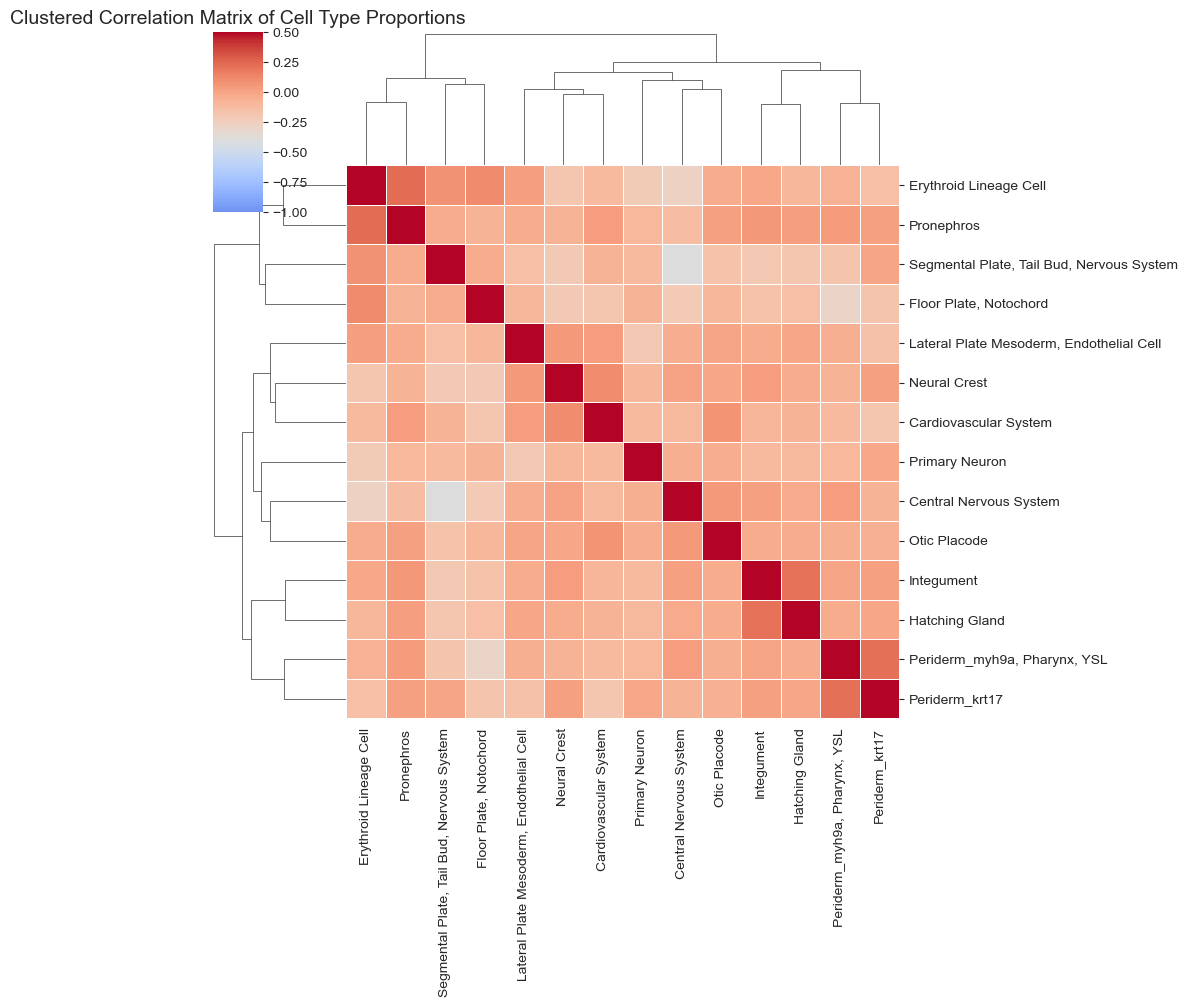

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 读取细胞组成和坐标数据
file_path = 'D:/pythonplaces/MACD_github/MACD1/Result/dataset3/final_pro.csv'
result_df = pd.read_csv(file_path)

# 获取细胞类型列表（假设第一列是ID或坐标，剩下的列是细胞类型的丰度）
celltypes = result_df.columns[1:]  # 第一列假设是非丰度数据（如spot ID）

# 获取每个spot的细胞类型丰度数据
cell_abundance = result_df.iloc[:, 1:].values  # 细胞类型丰度矩阵

# ----------- 计算细胞类型之间的相关性 -----------
# 初始化相关性矩阵
correlation_matrix = np.zeros((len(celltypes), len(celltypes)))

# 计算细胞类型之间的相关性（使用 Pearson 相关系数）
for i, cell_type_1 in enumerate(celltypes):
    for j, cell_type_2 in enumerate(celltypes):
        # if i == j:
        #     correlation_matrix[i, j] = 0  # 对角线设为 0
        # else:
            # 获取两种细胞类型在所有采样点的丰度
            abundance_1 = cell_abundance[:, i]
            abundance_2 = cell_abundance[:, j]

            # 计算皮尔逊相关系数
            corr, _ = pearsonr(abundance_1, abundance_2)
            correlation_matrix[i, j] = corr

# 转换为 DataFrame 方便可视化
correlation_df = pd.DataFrame(correlation_matrix, index=celltypes, columns=celltypes)

# ----------- 进行层次聚类并可视化 -----------
plt.figure(figsize=(10, 8))

# 使用 seaborn.clustermap 进行聚类
clustergrid = sns.clustermap(
    correlation_df, 
    method='ward',  # 使用 Ward 层次聚类方法
    metric='euclidean',  # 使用欧几里得距离进行聚类
    cmap="coolwarm",  # 颜色映射
    vmin=-1, vmax=0.5, center=-0.4,  # 颜色范围
    linewidths=0.5,  # 热图边框线宽
    figsize=(10, 10)  # 画布大小
)

# 添加标题
plt.title("Clustered Correlation Matrix of Cell Type Proportions", fontsize=14)

# 保存聚类热图
output_path = "D:/pythonplaces/MACD_github/img/dataset3/heatmap_clustered.pdf"
plt.savefig(output_path, format="pdf", bbox_inches="tight")

# 显示图像
plt.show()
